# APP PREDICTION - PROJECT

use case/condition - 1st of oct. -> your exam -> 30 questions 

100 questions - training questions or learning questions -> training dataset

100 -> 70 and 30 -> spliting our training dataset into train and test dataset

70 -> qus. and ans. -> 2 days -> learning has been done -> model training or learning

30 -> questions -> trying to predict the answers this questions -> 30 predicted_ans -> predicting the ans from the model that you trained

compare 30 -> actual answers with your predictec_ans -> calculating accuray with the predicted and actual ans.

single variable - null value, missing values, outliers, var, std, mean, median, mode, distribution

correlation between target variable and other features 

correlation between every feature columns

skewness of the columns

univariate analysis 

bivariate analysis

min and max value of every column

multivariate analysis

iqr and lower band and upper band outliers


numerical and caterogrical 

numerical two variables or relationship -> scatter plot, 

numerical single variables -> box plot, frequency or bar graph, histogram

caterogrical sinlge -> pie chart, histogram, frequency or bar graph, box plot, wordcloud

correlation -> heatmap 

In [ ]:
# supervised learning algorithms -> label present

# regression -> target or output is continuos data values -> 213,121,31212
# classification -> target or output is discreat data values -> class or 0 or 1 or 2 

In [ ]:

# housing price prediction problem -> target is price column and other are features 

# output = target = label = result = depedent variable = the value which you have to predict 

# features = independent variables = data = all are the features 

In [212]:
# 0. find the dependent variables and independent variables 
# 1. descriptive  analysis
# 2. data preprocessing or data cleaning
# 3. data visulization
# 4. feature engineering (scaling and importance of feature with the help of correlation matrix and graph)
# 5. spearate both variables in different dataframes
# 6. scaling then training or model building
# 7. prediction
# 8. result analysis or evalution of results from the model
# 9. deployment of ml model

In [169]:
# regression -> linear regression, lasso regression, polynomial regression, ridge regression, l1 regression and l2 regression, SVR
# classificatoin -> logistic regression, SVM, naive bais, knn

# cart -> decision tree, random forest, neural network (deep learning)

# accuracy analysis - https://scikit-learn.org/stable/modules/model_evaluation.html

In [179]:
# methods to remove the skewness
# log transform
# square root
# square
# cube root
# boxcox

# https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45
# https://opendatascience.com/transforming-skewed-data-for-machine-learning/
# https://reinec.medium.com/my-notes-handling-skewed-data-5984de303725

In [180]:
# methods to remove the oultiers

# remove from the dataset
# use decision tree or random forest algorithms bcz they can handle outliers 

# https://medium.com/analytics-vidhya/outlier-treatment-9bbe87384d02
# https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

In [176]:
# methods to remove the null or missing or nan values

# replace with mean, median, mode
# remove the missing rows or values
# replace with 0 or 1
# build predictive model 


In [178]:
# scaling of the dataset columns

# normlization 
# standartlization

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.Load the data file using pandas. 

In [156]:
df=pd.read_csv('googleplaystore.csv')

In [157]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 2.Check for null values in the data. Get the number of null values for each column.

In [158]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### 3.Drop records with nulls in any of the columns. 

In [159]:
df.dropna(inplace=True)

In [160]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


### 4.1 Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

        a.Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

        b.Extract the numeric value from the column

        c.Multiply the value by 1,000, if size is mentioned in Mb

In [9]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [10]:
# replace M with blanc and multiply by 1000
df.iloc[:,4]=df.iloc[:,4].apply(lambda x:float(str(x).replace('M',''))*1000 if 'M' in str(x) else x)

In [11]:
df.iloc[:,4]

0                   19000.0
1                   14000.0
2                    8700.0
3                   25000.0
4                    2800.0
                ...        
10834                2600.0
10836               53000.0
10837                3600.0
10839    Varies with device
10840               19000.0
Name: Size, Length: 9360, dtype: object

In [12]:
df.iloc[:,4]=df.iloc[:,4].apply(lambda x:float(str(x).replace("k"," ")) if "k" in str(x) else x)

In [13]:
df.iloc[:,4]

0                   19000.0
1                   14000.0
2                    8700.0
3                   25000.0
4                    2800.0
                ...        
10834                2600.0
10836               53000.0
10837                3600.0
10839    Varies with device
10840               19000.0
Name: Size, Length: 9360, dtype: object

In [14]:
df['Size'].unique()

array([19000.0, 14000.0, 8700.0, 25000.0, 2800.0, 5600.0, 29000.0,
       33000.0, 3100.0, 28000.0, 12000.0, 20000.0, 21000.0, 37000.0,
       5500.0, 17000.0, 39000.0, 31000.0, 4200.0, 23000.0, 6000.0, 6100.0,
       4600.0, 9200.0, 5200.0, 11000.0, 24000.0, 'Varies with device',
       9400.0, 15000.0, 10000.0, 1200.0, 26000.0, 8000.0, 7900.0, 56000.0,
       57000.0, 35000.0, 54000.0, 201.0, 3600.0, 5700.0, 8600.0, 2400.0,
       27000.0, 2700.0, 2500.0, 7000.0, 16000.0, 3400.0, 8900.0, 3900.0,
       2900.0, 38000.0, 32000.0, 5400.0, 18000.0, 1100.0, 2200.0, 4500.0,
       9800.0, 52000.0, 9000.0, 6700.0, 30000.0, 2600.0, 7100.0, 22000.0,
       6400.0, 3200.0, 8200.0, 4900.0, 9500.0, 5000.0, 5900.0, 13000.0,
       73000.0, 6800.0, 3500.0, 4000.0, 2300.0, 2100.0, 42000.0, 9100.0,
       55000.0, 23.0, 7300.0, 6500.0, 1500.0, 7500.0, 51000.0, 41000.0,
       48000.0, 8500.0, 46000.0, 8300.0, 4300.0, 4700.0, 3300.0, 40000.0,
       7800.0, 8800.0, 6600.0, 5100.0, 61000.0, 66000.0, 7

In [15]:
df.iloc[:,4]=df.iloc[:,4].apply(lambda x:float(str(x).replace("Varies with device","0")) if "Varies with device" in str(x) else x)

In [16]:
df['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+03, 2.50e+04, 2.80e+03, 5.60e+03,
       2.90e+04, 3.30e+04, 3.10e+03, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 5.50e+03, 1.70e+04, 3.90e+04, 3.10e+04,
       4.20e+03, 2.30e+04, 6.00e+03, 6.10e+03, 4.60e+03, 9.20e+03,
       5.20e+03, 1.10e+04, 2.40e+04, 0.00e+00, 9.40e+03, 1.50e+04,
       1.00e+04, 1.20e+03, 2.60e+04, 8.00e+03, 7.90e+03, 5.60e+04,
       5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02, 3.60e+03, 5.70e+03,
       8.60e+03, 2.40e+03, 2.70e+04, 2.70e+03, 2.50e+03, 7.00e+03,
       1.60e+04, 3.40e+03, 8.90e+03, 3.90e+03, 2.90e+03, 3.80e+04,
       3.20e+04, 5.40e+03, 1.80e+04, 1.10e+03, 2.20e+03, 4.50e+03,
       9.80e+03, 5.20e+04, 9.00e+03, 6.70e+03, 3.00e+04, 2.60e+03,
       7.10e+03, 2.20e+04, 6.40e+03, 3.20e+03, 8.20e+03, 4.90e+03,
       9.50e+03, 5.00e+03, 5.90e+03, 1.30e+04, 7.30e+04, 6.80e+03,
       3.50e+03, 4.00e+03, 2.30e+03, 2.10e+03, 4.20e+04, 9.10e+03,
       5.50e+04, 2.30e+01, 7.30e+03, 6.50e+03, 1.50e+03, 7.50e

### 4.2 Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [17]:
df['Reviews']=df['Reviews'].astype('int')

In [18]:
df['Reviews'].apply(lambda x:float(x))

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10834         7.0
10836        38.0
10837         4.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 9360, dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1023.8+ KB


### 4.3 Installs field is currently stored as string and has values like 1,000,000+. 

        a.Treat 1,000,000+ as 1,000,000

        b.remove ‘+’, ‘,’ from the field, convert it to integer

In [163]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [20]:
df['Installs']=df['Installs'].apply(lambda x:int(x.replace("+","").replace(",","")))

In [21]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: int64

### 4.4 Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [22]:
df['Price']=df['Price'].apply(lambda x:float(x.replace("$","")))

In [23]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

### 4.5.1 5. Sanity checks:

            Average rating should be between 1 and 5 as only these values are allowed on the play store.
            Drop the rows that have a value outside this range

In [24]:
df['Rating'].max()

5.0

In [25]:
df['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [26]:
df[(df['Rating']<1)|(df['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### 4.5.2 Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [27]:
df=df.drop(df[df['Reviews']>df['Installs']].index)

In [28]:

df.reset_index(inplace=True,drop=True)

In [29]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9348,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9349,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9350,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9351,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 4.5.3 For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [33]:
df[(df['Type']=='Free')&(df['Price']>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [34]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9348,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9349,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9350,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9351,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [35]:
### the price of the free app is not greatr than 0 so there is no need to drop any rows

### 5.1 Performing univariate analysis: 

      *Boxplot for Price

           *Are there any outliers? Think about the price of usual apps on Play Store.

<AxesSubplot:xlabel='Price'>

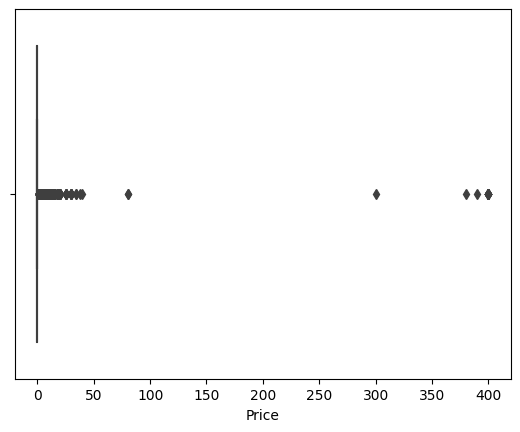

In [36]:
sns.boxplot(x="Price",data=df)

In [37]:
### there are outliers in the price data, the price of the apps are mostly below 50 

### 5.2 Boxplot for Reviews

           *Are there any apps with very high number of reviews? Do the values seem right?

<AxesSubplot:xlabel='Reviews'>

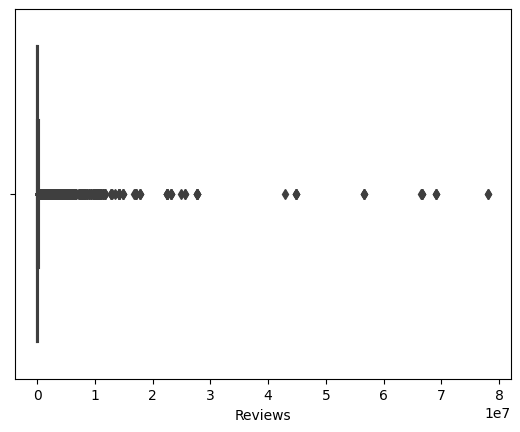

In [38]:
sns.boxplot(x='Reviews',data=df)

(0.0, 100000.0)

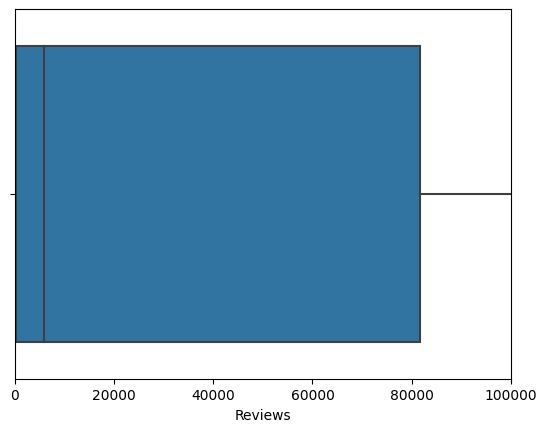

In [39]:
sns.boxplot(x='Reviews',data=df)
plt.xlim(0,100000)

In [40]:
### yes there is an app with hight nuber of reviews 

### 5.3 Histogram for Rating

           *How are the ratings distributed? Is it more toward higher ratings?

(array([  17.,   18.,   41.,   74.,  137.,  445.,  879., 1660., 4172.,
        1910.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

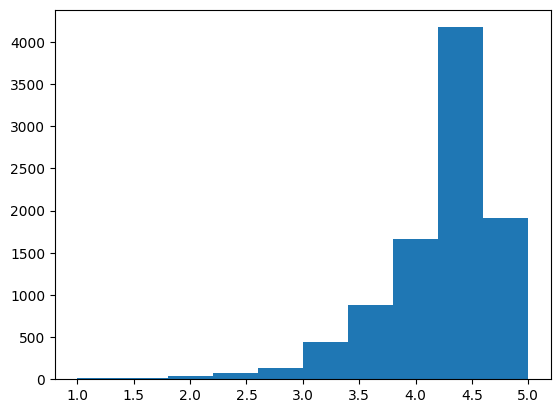

In [41]:
plt.hist(x='Rating',data=df)

In [42]:
###  the ratings are distributed stepup wise

### 5.4 Histogram for Size

(array([4779., 1386., 1036.,  617.,  464.,  334.,  234.,  174.,  125.,
         204.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000.]),
 <BarContainer object of 10 artists>)

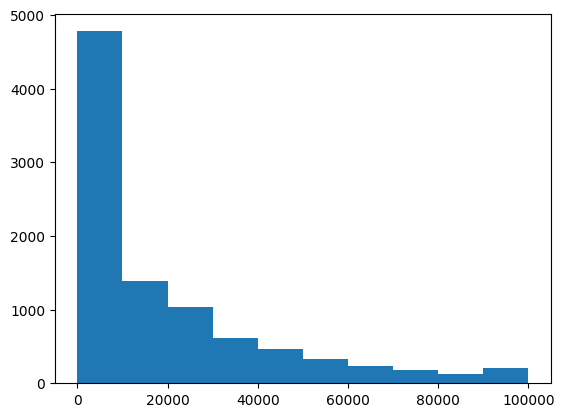

In [43]:
plt.hist(x='Size',data=df)

### 6. Outlier treatment: 

          *Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

                      *Check out the records with very high price

                            *Is 200 indeed a high price?

           *Drop these as most seem to be junk apps

In [44]:
df[df['Price']>200].index

Int64Index([4035, 4188, 4193, 5040, 5043, 5044, 5045, 5046, 5047, 5048, 5051,
            5053, 5055, 5058, 5062],
           dtype='int64')

In [45]:
df.drop(df[df['Price']>200].index,inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9338 entries, 0 to 9352
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9338 non-null   object 
 1   Category        9338 non-null   object 
 2   Rating          9338 non-null   float64
 3   Reviews         9338 non-null   int64  
 4   Size            9338 non-null   float64
 5   Installs        9338 non-null   int64  
 6   Type            9338 non-null   object 
 7   Price           9338 non-null   float64
 8   Content Rating  9338 non-null   object 
 9   Genres          9338 non-null   object 
 10  Last Updated    9338 non-null   object 
 11  Current Ver     9338 non-null   object 
 12  Android Ver     9338 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1021.3+ KB


### 6.2 Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with                     the analysis and, in fact, will skew it. Drop records having more than 2 million reviews

In [47]:
df.drop(df[df['Reviews']>2000000].index,inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8885 entries, 0 to 9352
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8885 non-null   object 
 1   Category        8885 non-null   object 
 2   Rating          8885 non-null   float64
 3   Reviews         8885 non-null   int64  
 4   Size            8885 non-null   float64
 5   Installs        8885 non-null   int64  
 6   Type            8885 non-null   object 
 7   Price           8885 non-null   float64
 8   Content Rating  8885 non-null   object 
 9   Genres          8885 non-null   object 
 10  Last Updated    8885 non-null   object 
 11  Current Ver     8885 non-null   object 
 12  Android Ver     8885 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 971.8+ KB


### 6.3 Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

         *Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

         *Decide a threshold as cutoff for outlier and drop records having values more than that

In [49]:
df['Installs'].quantile([.1,.25,.5,.7,.9,.95,.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [50]:
df.drop(df[df['Installs']>10000000].index,inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8496 entries, 0 to 9352
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8496 non-null   object 
 1   Category        8496 non-null   object 
 2   Rating          8496 non-null   float64
 3   Reviews         8496 non-null   int64  
 4   Size            8496 non-null   float64
 5   Installs        8496 non-null   int64  
 6   Type            8496 non-null   object 
 7   Price           8496 non-null   float64
 8   Content Rating  8496 non-null   object 
 9   Genres          8496 non-null   object 
 10  Last Updated    8496 non-null   object 
 11  Current Ver     8496 non-null   object 
 12  Android Ver     8496 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 929.2+ KB


### 7.1 Make scatter plot/joinplot for Rating vs. Price

        *What pattern do you observe? Does rating increase with price?

<AxesSubplot:xlabel='Rating', ylabel='Price'>

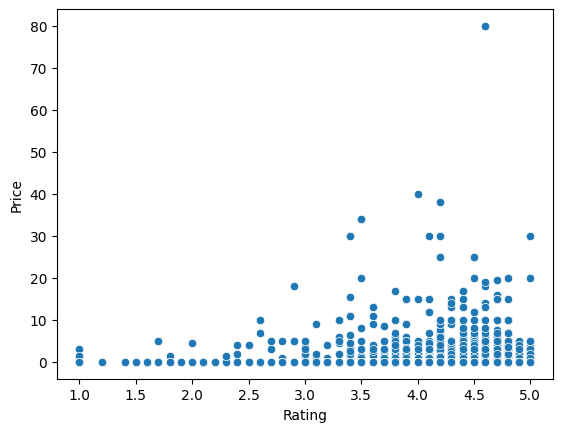

In [52]:
sns.scatterplot(x='Rating',y='Price',data=df)

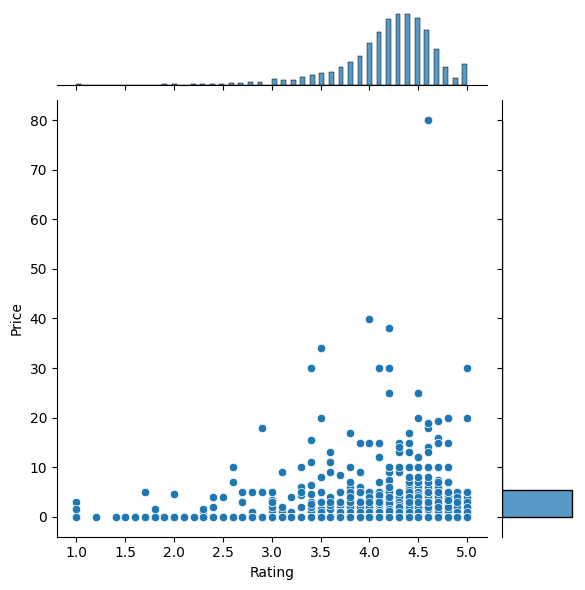

In [53]:
sns.jointplot(x='Rating',y='Price',data=df)


yes ,paid apps are higher rating compared to free apps

### 7.2 Make scatter plot/joinplot for Rating vs. Size

          *Are heavier apps rated better?

sns.scatterplot(x='Rating',y='Size',data=df)

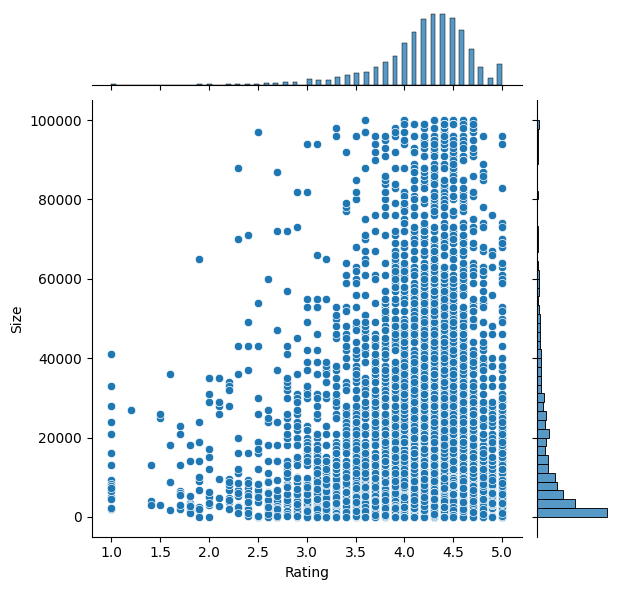

In [54]:
sns.jointplot(x='Rating',y='Size',data=df)

yes from the plot it seems heavier appa are rated better

### 7.4 Make boxplot for Rating vs. Content Rating

          *Is there any difference in the ratings? Are some types liked better?

In [165]:
df[df['Content Rating'] == 'Everyone']['Rating']

0        4.1
1        3.9
2        4.7
4        4.3
5        4.4
        ... 
10833    4.8
10834    4.0
10836    4.5
10837    5.0
10840    4.5
Name: Rating, Length: 7414, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

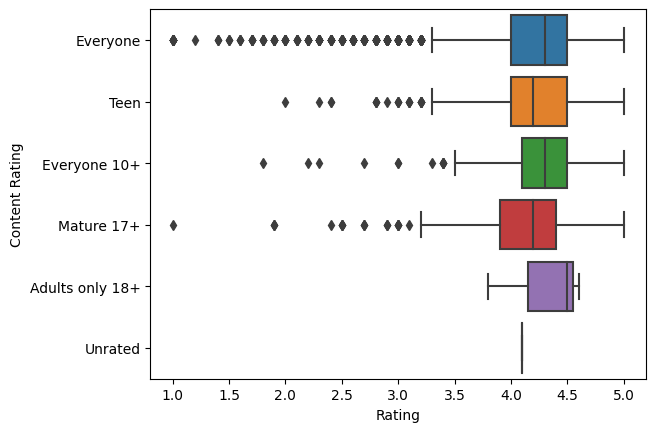

In [55]:
sns.boxplot(x='Rating',y='Content Rating',data=df)

Apps which are for everyone has more bad ratings compare to other sections as it has so much outliers value, while 18+ apps have better ratings.

### 7.3 Make scatter plot/joinplot for Rating vs. Reviews

            *Does more review mean a better rating always?

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

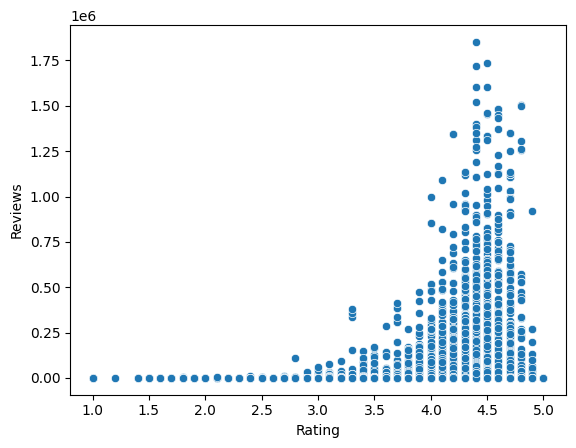

In [57]:
sns.scatterplot(x='Rating',y='Reviews',data=df)

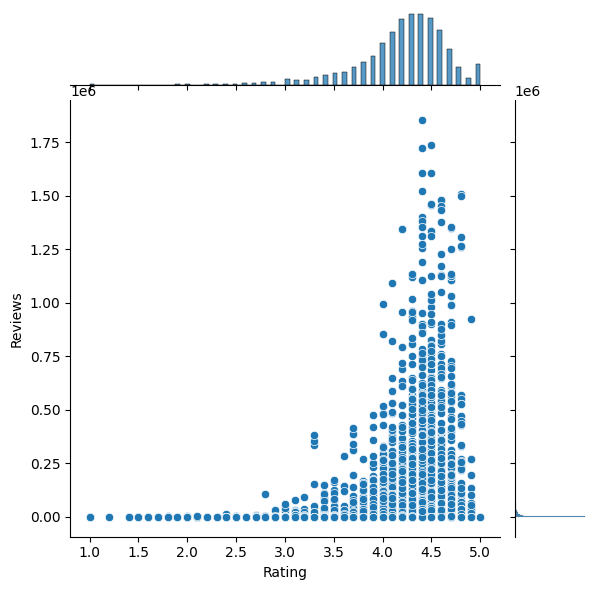

In [58]:
sns.jointplot(x='Rating',y='Reviews',data=df)

It is clear that more reviews makes app rating better.

### 7.5 Make boxplot for Ratings vs. Category

          *Which genre has the best ratings?

<AxesSubplot:xlabel='Rating', ylabel='Category'>

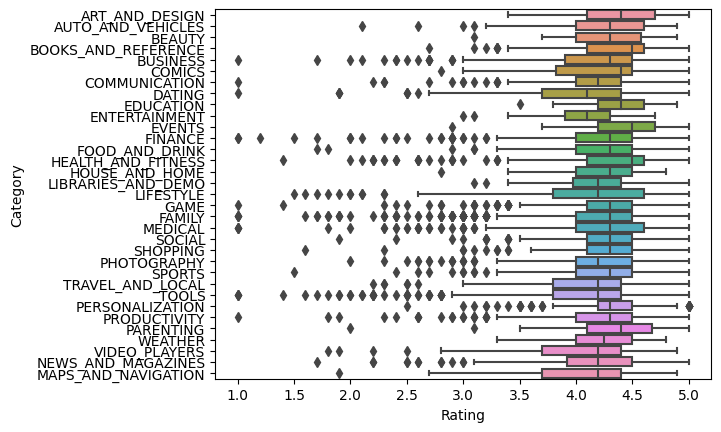

In [59]:
sns.boxplot(x='Rating',y='Category',data=df)


In [68]:
print("Before, figure default size is: ", plt.rcParams["figure.figsize"])
plt.rcParams["figure.figsize"] = (10, 20)
print("After, figure default size is: ", plt.rcParams["figure.figsize"])

Before, figure default size is:  [20.0, 20.0]
After, figure default size is:  [10.0, 20.0]


<AxesSubplot:xlabel='Rating', ylabel='Category'>

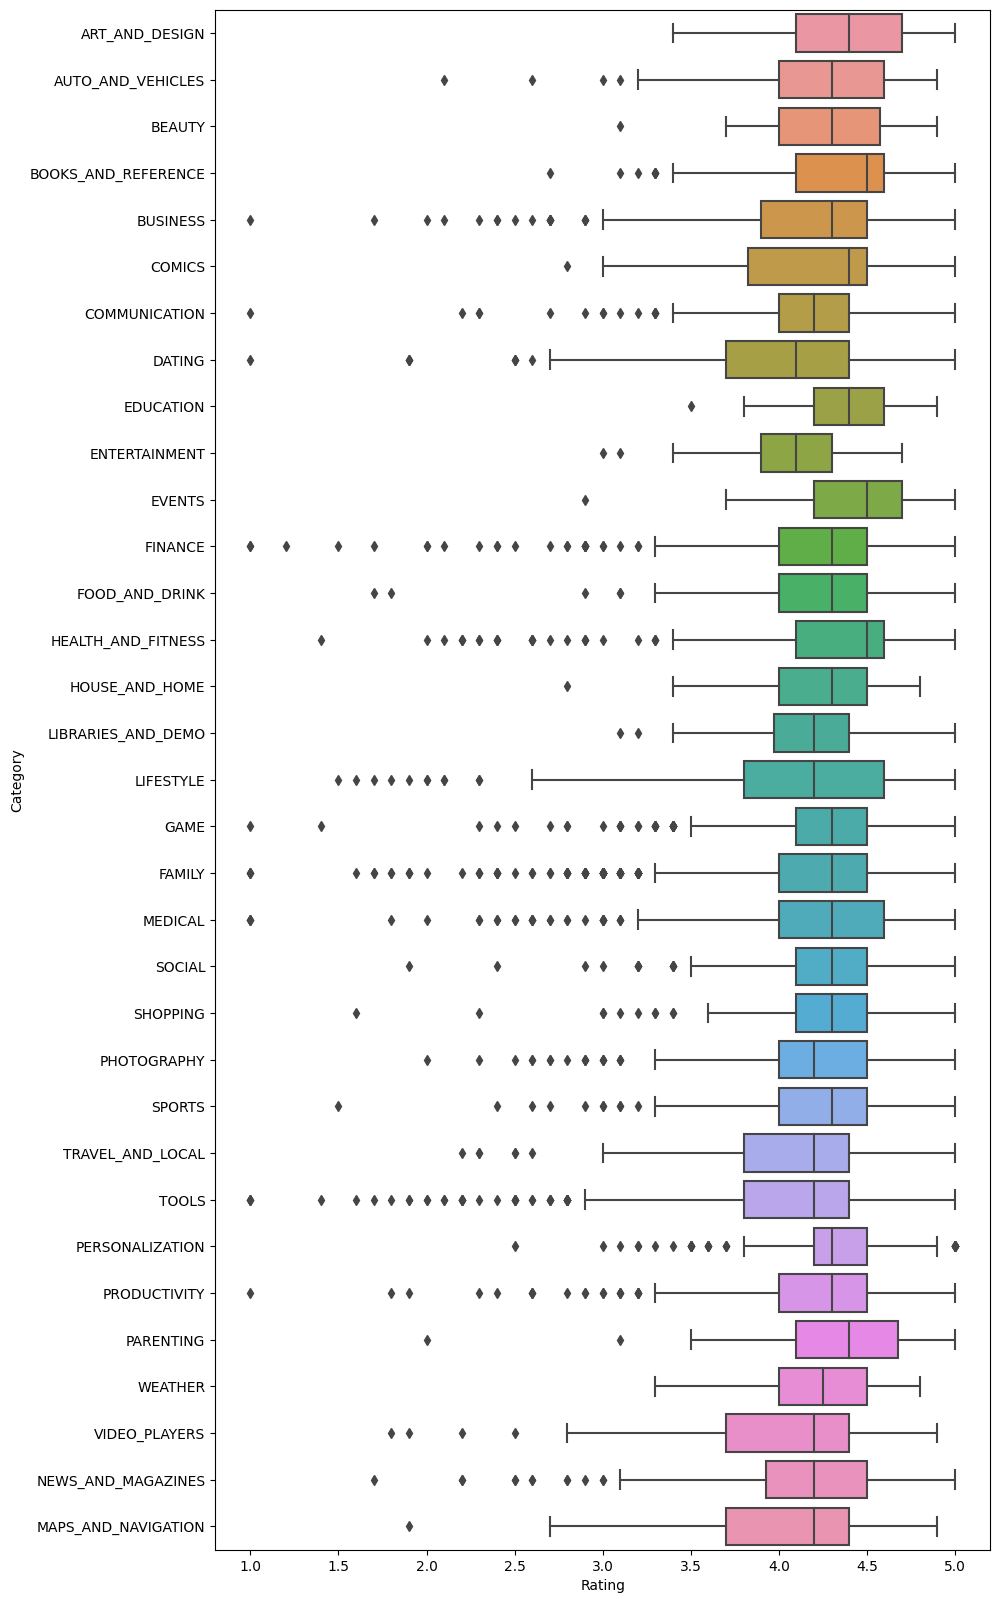

In [69]:

sns.boxplot(x='Rating',y='Category',data=df)


Events apps had best rating

### 8.Data preprocessing

In [74]:


cop1=df.copy()

In [75]:
inp1=cop1

In [76]:
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9348,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9349,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9350,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9351,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device



### 8.1 Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [77]:
inp1['Reviews']

0          159
1          967
2        87510
4          967
5          167
         ...  
9348         7
9349        38
9350         4
9351       114
9352    398307
Name: Reviews, Length: 8496, dtype: int64

In [78]:
inp1['Reviews']=np.log1p(inp1['Reviews'])

In [79]:
reviewskew=inp1['Reviews']
reviewskew

0        5.075174
1        6.875232
2       11.379520
4        6.875232
5        5.123964
          ...    
9348     2.079442
9349     3.663562
9350     1.609438
9351     4.744932
9352    12.894981
Name: Reviews, Length: 8496, dtype: float64

In [80]:
inp1['Installs']

0          10000
1         500000
2        5000000
4         100000
5          50000
          ...   
9348         500
9349        5000
9350         100
9351        1000
9352    10000000
Name: Installs, Length: 8496, dtype: int64

In [81]:
inp1['Installs']=np.log1p(inp1['Installs'])

In [82]:
installskew=inp1['Installs']
installskew

0        9.210440
1       13.122365
2       15.424949
4       11.512935
5       10.819798
          ...    
9348     6.216606
9349     8.517393
9350     4.615121
9351     6.908755
9352    16.118096
Name: Installs, Length: 8496, dtype: float64

In [83]:
reviewskew.skew()

-0.20039949659264134

In [84]:
installskew.skew()

-0.5097286542754812

### 8.2 Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [85]:
inp1.drop( ['App','Last Updated','Current Ver','Android Ver','Type'],axis=1,inplace=True)

In [86]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,0.0,Everyone,Art & Design



### 8.3 Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [87]:
inp2=inp1
inp2

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,0.0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...
9348,FAMILY,4.0,2.079442,2600.0,6.216606,0.0,Everyone,Education
9349,FAMILY,4.5,3.663562,53000.0,8.517393,0.0,Everyone,Education
9350,FAMILY,5.0,1.609438,3600.0,4.615121,0.0,Everyone,Education
9351,BOOKS_AND_REFERENCE,4.5,4.744932,0.0,6.908755,0.0,Mature 17+,Books & Reference


In [88]:
inp2.Category = pd.Categorical(inp2.Category)

x = inp2[['Category']]
del inp2['Category']

dummies = pd.get_dummies(x, prefix = 'Category')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9348,4.0,2.079442,2600.0,6.216606,0.0,Everyone,Education,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9349,4.5,3.663562,53000.0,8.517393,0.0,Everyone,Education,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9350,5.0,1.609438,3600.0,4.615121,0.0,Everyone,Education,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9351,4.5,4.744932,0.0,6.908755,0.0,Mature 17+,Books & Reference,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
inp2.Genres = pd.Categorical(inp2['Genres'])
x = inp2[["Genres"]]
del inp2['Genres']
dummies = pd.get_dummies(x, prefix = 'Genres')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2

,Rating,Reviews,Size,Installs,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9348,4.0,2.079442,2600.0,6.216606,0.0,Everyone,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9349,4.5,3.663562,53000.0,8.517393,0.0,Everyone,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9350,5.0,1.609438,3600.0,4.615121,0.0,Everyone,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9351,4.5,4.744932,0.0,6.908755,0.0,Mature 17+,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [90]:
inp2['Content Rating'] = pd.Categorical(inp2['Content Rating'])

x = inp2[['Content Rating']]
del inp2['Content Rating']

dummies = pd.get_dummies(x, prefix = 'Content Rating')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [91]:
inp2

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9348,4.0,2.079442,2600.0,6.216606,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9349,4.5,3.663562,53000.0,8.517393,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9350,5.0,1.609438,3600.0,4.615121,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9351,4.5,4.744932,0.0,6.908755,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
df_train,df_test=train_test_split(inp2,test_size=0.3)
df_train

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
5801,3.3,2.397895,3300.0,6.908755,0.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8907,4.2,8.154500,0.0,13.122365,0.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4816,4.7,6.324359,6700.0,9.210440,0.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5312,4.5,9.690480,99000.0,11.512935,2.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9179,1.0,1.386294,41000.0,6.216606,0.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3273,4.2,11.630531,4300.0,16.118096,0.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
505,3.9,6.748760,27000.0,11.512935,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4874,4.7,4.234107,6500.0,9.210440,0.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
986,3.6,10.864885,42000.0,15.424949,0.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### 10.Separate the dataframes into X_train, y_train, X_test, and y_test.

In [112]:
x_train=df_train.drop("Rating",axis=1)
y_train=df_train["Rating"]
x_test=df_test.drop("Rating",axis=1)
y_test=df_test["Rating"]

### 11. Model building

         *Use linear regression as the technique

         *Report the R2 on the train set

In [113]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [122]:
y_predicted=lm.predict(x_train)
y_predicted_train=y_predicted

In [123]:
y_predicted=lm.predict(x_test)
y_predicted_test=y_predicted

In [124]:
x_train.shape, y_predicted_train.shape

((5947, 158), (5947,))

In [125]:
lm.score(x_train,y_predicted_train)

1.0

In [126]:
lm.score(x_test,y_predicted_test)

1.0

In [101]:
from sklearn.metrics import mean_squared_error as mse

In [127]:
R2_train = round(lm.score(x_train,y_train),3)
print("The R2 value of the Training Set is : {}".format(R2_train))

The R2 value of the Training Set is : 0.157


### 12.Make predictions on test set and report R2.

In [128]:
y_predicted=lm.predict(x_test)

In [129]:
y_predicted

array([3.96803138, 4.16111413, 4.20792224, ..., 4.29765516, 3.98277289,
       3.90669755])

In [131]:
R2_test= round(lm.score(x_test,y_predicted),3)
print("The R2 value of the Testing Set is : {}".format(R2_test))

The R2 value of the Testing Set is : 1.0


In [132]:
import os
os.getcwd()

'/home/vijendra/project2/notebooks/usa'

In [133]:
import pickle
pickle.dump(lm, open('rating_model_prediction.pkl', 'wb'))

In [143]:
import pickle

def price_prediction(features):
    
    pickled_model = pickle.load(open('rating_model_prediction.pkl', 'rb'))
    house_price = str(round(list(pickled_model.predict([features]))[0]))
    
    return str("rating may be "  + house_price)

In [154]:
import random
test_features  = list(x_test.iloc[random.randint(0,300),:])

In [155]:
price_prediction(test_features)


/home/vijendra/project2/project2env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'rating may be 4'